Output directory 'img' is ready.

Generating Figure 1: Performance Curve...
Figure 1 saved to: img\62_fig_2_num_teachers_curve.pdf


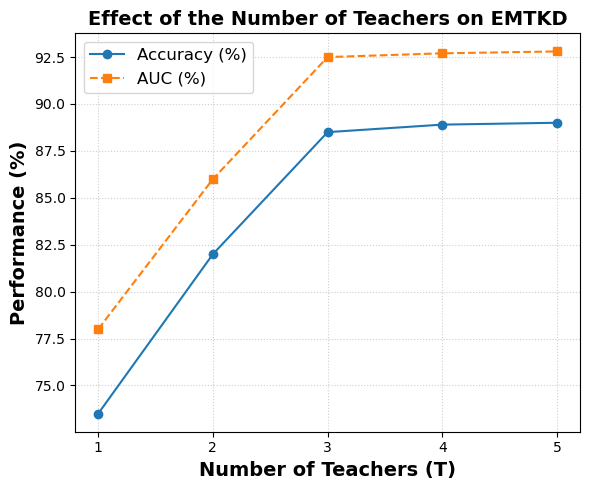


Generating Figure 2: Weight Heatmap...
Figure 2 saved to: img\62_fig_3_weight_heatmap.pdf


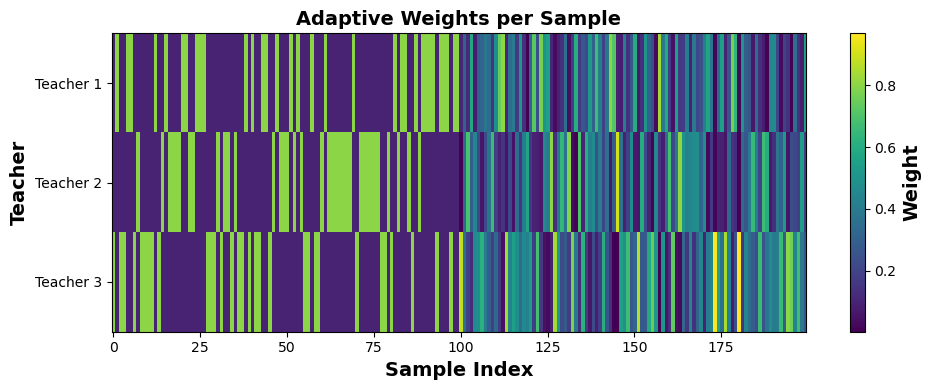


All figures generated successfully.


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt

# ==================================================================
# Data Generation Functions
# ==================================================================

def generate_performance_data():
    """
    Generates placeholder performance data for the EMTKD method as a
    function of the number of teachers. This data is used for the
    performance curve plot.

    Returns:
        tuple: A tuple containing:
            - np.ndarray: Array of teacher counts (T).
            - np.ndarray: Corresponding accuracy percentages.
            - np.ndarray: Corresponding AUC percentages.
    """
    # Number of teachers from 1 to 5
    num_teachers = np.arange(1, 6)
    # Placeholder metrics matching the narrative
    accuracy = np.array([73.5, 82.0, 88.5, 88.9, 89.0])
    auc = np.array([78.0, 86.0, 92.5, 92.7, 92.8])
    return num_teachers, accuracy, auc

def generate_weight_data(n_teachers=3, n_samples=200, seed=42):
    """
    Simulates adaptive teacher weights for samples sorted by difficulty.

    The first half of the samples are "easy," where one teacher's weight
    dominates. The second half are "hard," with weights drawn from a
    balanced Dirichlet distribution, representing higher uncertainty.

    Args:
        n_teachers (int): The number of teacher models.
        n_samples (int): The total number of samples.
        seed (int): A random seed for reproducibility.

    Returns:
        np.ndarray: A (n_teachers x n_samples) matrix of weights.
    """
    np.random.seed(seed)
    n_easy = n_samples // 2
    n_hard = n_samples - n_easy

    # 1. Easy Samples: One teacher dominates with a weight of 0.8
    # The remaining weight is distributed among other teachers.
    remaining_weight = (1.0 - 0.8) / (n_teachers - 1)
    weights_easy = np.full((n_teachers, n_easy), remaining_weight)
    dominant_teachers = np.random.choice(n_teachers, size=n_easy)
    weights_easy[dominant_teachers, np.arange(n_easy)] = 0.8

    # 2. Hard Samples: Weights are balanced, drawn from a Dirichlet distribution
    alpha = np.ones(n_teachers)
    weights_hard = np.random.dirichlet(alpha, size=n_hard).T  # Transpose to get shape (n_teachers, n_hard)

    # 3. Concatenate easy and hard samples
    weights = np.hstack([weights_easy, weights_hard])
    return weights

# ==================================================================
# Plotting Functions
# ==================================================================

def plot_performance_curve(ax, num_teachers, accuracy, auc):
    """
    Plots performance curves (Accuracy, AUC) on a Matplotlib Axes object,
    applying specific styling for fonts, grid, and legend.

    Args:
        ax (matplotlib.axes.Axes): The axes object to plot on.
        num_teachers (np.ndarray): X-axis values (number of teachers).
        accuracy (np.ndarray): Y-axis values for the accuracy curve.
        auc (np.ndarray): Y-axis values for the AUC curve.
    """
    # Plot data with specified markers and line styles
    ax.plot(num_teachers, accuracy, marker='o', linestyle='-', label='Accuracy (%)')
    ax.plot(num_teachers, auc, marker='s', linestyle='--', label='AUC (%)')

    # Apply professional styling
    ax.set_title('Effect of the Number of Teachers on EMTKD', fontsize=14, fontweight='bold')
    ax.set_xlabel('Number of Teachers (T)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Performance (%)', fontsize=14, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_xticks(num_teachers)  # Ensure integer ticks for teacher count
    ax.grid(True, linestyle=':', alpha=0.6)
    ax.legend(fontsize=12, loc='best')

def plot_weight_heatmap(ax, weights):
    """
    Plots adaptive weights as a heatmap on a Matplotlib Axes object,
    applying specific styling for fonts, ticks, and the colorbar.

    Args:
        ax (matplotlib.axes.Axes): The axes object to plot on.
        weights (np.ndarray): The (n_teachers x n_samples) weight matrix.
    """
    n_teachers = weights.shape[0]

    # Create the heatmap with a perceptually uniform colormap
    im = ax.imshow(weights, aspect='auto', cmap='viridis')

    # Create and style the colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Weight', fontsize=14, fontweight='bold')
    cbar.ax.tick_params(labelsize=10)

    # Apply professional styling
    ax.set_title('Adaptive Weights per Sample', fontsize=14, fontweight='bold')
    ax.set_xlabel('Sample Index', fontsize=14, fontweight='bold')
    ax.set_ylabel('Teacher', fontsize=14, fontweight='bold')

    # Set y-axis ticks and labels
    ax.set_yticks(np.arange(n_teachers))
    ax.set_yticklabels([f'Teacher {i+1}' for i in range(n_teachers)])
    ax.tick_params(axis='y', which='major', labelsize=10, rotation=0)
    ax.tick_params(axis='x', which='major', labelsize=10)

# ==================================================================
# Main Script Execution
# ==================================================================

def main():
    """
    Main function to generate data, create plots, and save figures.
    """
    # --- Setup ---
    # Ensure the output directory exists
    out_dir = "img"
    os.makedirs(out_dir, exist_ok=True)
    print(f"Output directory '{out_dir}' is ready.")

    # --- Figure 1: Performance Curve ---
    print("\nGenerating Figure 1: Performance Curve...")
    # Generate data
    num_teachers, accuracy, auc = generate_performance_data()

    # Create and style the plot
    fig1, ax1 = plt.subplots(figsize=(6, 5))  # Professional aspect ratio
    plot_performance_curve(ax1, num_teachers, accuracy, auc)
    fig1.tight_layout()

    # Save the figure in high quality
    fig1_path = os.path.join(out_dir, "62_fig_2_num_teachers_curve.pdf")
    plt.savefig(fig1_path, format="pdf", dpi=600, bbox_inches='tight')
    print(f"Figure 1 saved to: {fig1_path}")
    plt.show()
    plt.close(fig1)

    # --- Figure 2: Weight Heatmap ---
    print("\nGenerating Figure 2: Weight Heatmap...")
    # Generate data
    weights = generate_weight_data(n_teachers=3, n_samples=200, seed=42)

    # Create and style the plot
    fig2, ax2 = plt.subplots(figsize=(10, 4))  # Wide aspect ratio for heatmap
    plot_weight_heatmap(ax2, weights)
    fig2.tight_layout()

    # Save the figure in high quality
    fig2_path = os.path.join(out_dir, "62_fig_3_weight_heatmap.pdf")
    plt.savefig(fig2_path, format="pdf", dpi=600, bbox_inches='tight')
    print(f"Figure 2 saved to: {fig2_path}")
    plt.show()
    plt.close(fig2)

    print("\nAll figures generated successfully.")

# --- Script Entry Point ---
if __name__ == "__main__":
    main()